<a href="https://colab.research.google.com/github/zaaaana/CASA04_codes/blob/master/RFCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Algorithm 

## Import needed dependencies :

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from google.colab import drive

## Load the preprocessed dataset:

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
testing = pd.read_csv('')

testing.head()

In [ ]:
y = testing['MainMode_B04ID']
X = testing.drop(['MainMode_B04ID'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.35, random_state=0)

## Set the parameters for the random forest model :

In [ ]:
#For mode choice

parameters = {'bootstrap': True,
              'min_samples_leaf': 1,
              'n_estimators': 25, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 19,
              'max_leaf_nodes': None,
              'criterion': 'entropy'}

## Define the model :

In [ ]:
RF_model = RandomForestClassifier(**parameters)

## Train the model :

In [ ]:
RF_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=19, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test the trained model on test data :

In [ ]:
RF_predictions = RF_model.predict(test_X)

In [ ]:
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.48167778568854436


In [ ]:
print(metrics.classification_report(RF_predictions, test_y))

              precision    recall  f1-score   support

           1       0.04      0.25      0.07      2195
           2       0.02      0.19      0.04       254
           3       0.90      0.51      0.65     98555
           4       0.13      0.36      0.19     10401
           5       0.03      0.24      0.06        63
           6       0.03      0.22      0.06       172
           7       0.15      0.41      0.21       507
           8       0.04      0.28      0.07       948
           9       0.00      0.00      0.00         7
          10       0.05      0.24      0.08       175
          11       0.02      0.13      0.03       214
          12       0.02      0.18      0.04       207
          13       0.07      0.27      0.11        71

    accuracy                           0.48    113769
   macro avg       0.12      0.25      0.12    113769
weighted avg       0.79      0.48      0.58    113769



[[  541    30 10761  1125     6    25    52   140     1    21    33    23
      8]
 [   45    47  1689   147     0     5     6    17     0     0     2     2
      0]
 [  738    80 49772  4058    28    41    89   268     3    47    75    61
     21]
 [  466    59 25459  3791     7    45    67   211     2    34    45    41
      9]
 [    9     1   364    50    15     0     1     5     0     0     1     1
      0]
 [   12     2   938   114     0    38     6     2     0     0     0     6
      0]
 [   54     6   991   129     0     2   208     0     1    18    10     2
      8]
 [  178    18  5101   589     4    10     6   262     0     6     7    21
      2]
 [    2     0    64     9     0     0     1     0     0     0     0     2
      0]
 [   31     3   650    81     0     2    36     3     0    42    11     6
      2]
 [   39     6  1248   129     3     1    21     9     0     4    28     4
      1]
 [   64     2  1297   156     0     3    10    29     0     0     2    37
      1]
 [  

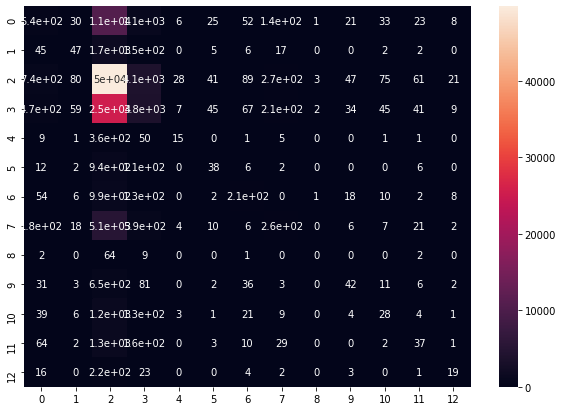

In [ ]:
CM = confusion_matrix(test_y, RF_predictions)
print(CM)

# Visualize it as a heatmap
#import seaborn
plt.figure(figsize = (10, 7))
sns.heatmap(CM, annot=True)